<a href="https://colab.research.google.com/github/h8erqqq/ML/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [ ]:
df = # чтение файла

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [11]:
df = pd.read_csv('/content/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [13]:
# your_code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Загрузка данных
df = pd.read_csv('/content/Covid Data.csv')

# Удаление столбцов с высоким % специальных значений
missing_values_codes = [97, 98, 99]
columns_to_drop = ['INTUBED', 'PREGNANT', 'ICU']  # в них встречаются такие пролпуски
df_cleaned = df.drop(columns=columns_to_drop)

# Замена специальных значений на NaN чтобы заменить на моду
for code in missing_values_codes:
    df_cleaned.replace(code, np.nan, inplace=True)

# Замена пропусков модой для каждого столбца
for column in df_cleaned.columns:
    mode_value = df_cleaned[column].mode()[0]
    df_cleaned[column].fillna(mode_value, inplace=True)

# Создание копии DataFrame для кластеризации
df_cluster = df_cleaned.copy()

# Масштабирование числового признака (AGE)
numerical_features = ['AGE']
scaler = StandardScaler()
df_cluster[numerical_features] = scaler.fit_transform(df_cluster[numerical_features])

# Кодирование категориальных признаков
categorical_features = df_cluster.columns.drop(['SEX', 'ASTHMA'])
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_cluster[feature] = le.fit_transform(df_cluster[feature])
    label_encoders[feature] = le  # Сохраняем кодировщик для каждого признака


In [7]:
df_cleaned


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1.0,65.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3
1,2,1,2,1,03/06/2020,1.0,72.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5
2,2,1,2,2,09/06/2020,2.0,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
3,2,1,1,1,12/06/2020,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
4,2,1,2,1,21/06/2020,2.0,68.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
1048571,1,13,2,2,9999-99-99,2.0,51.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7
1048572,2,13,2,1,9999-99-99,2.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
1048573,2,13,2,1,9999-99-99,2.0,28.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7


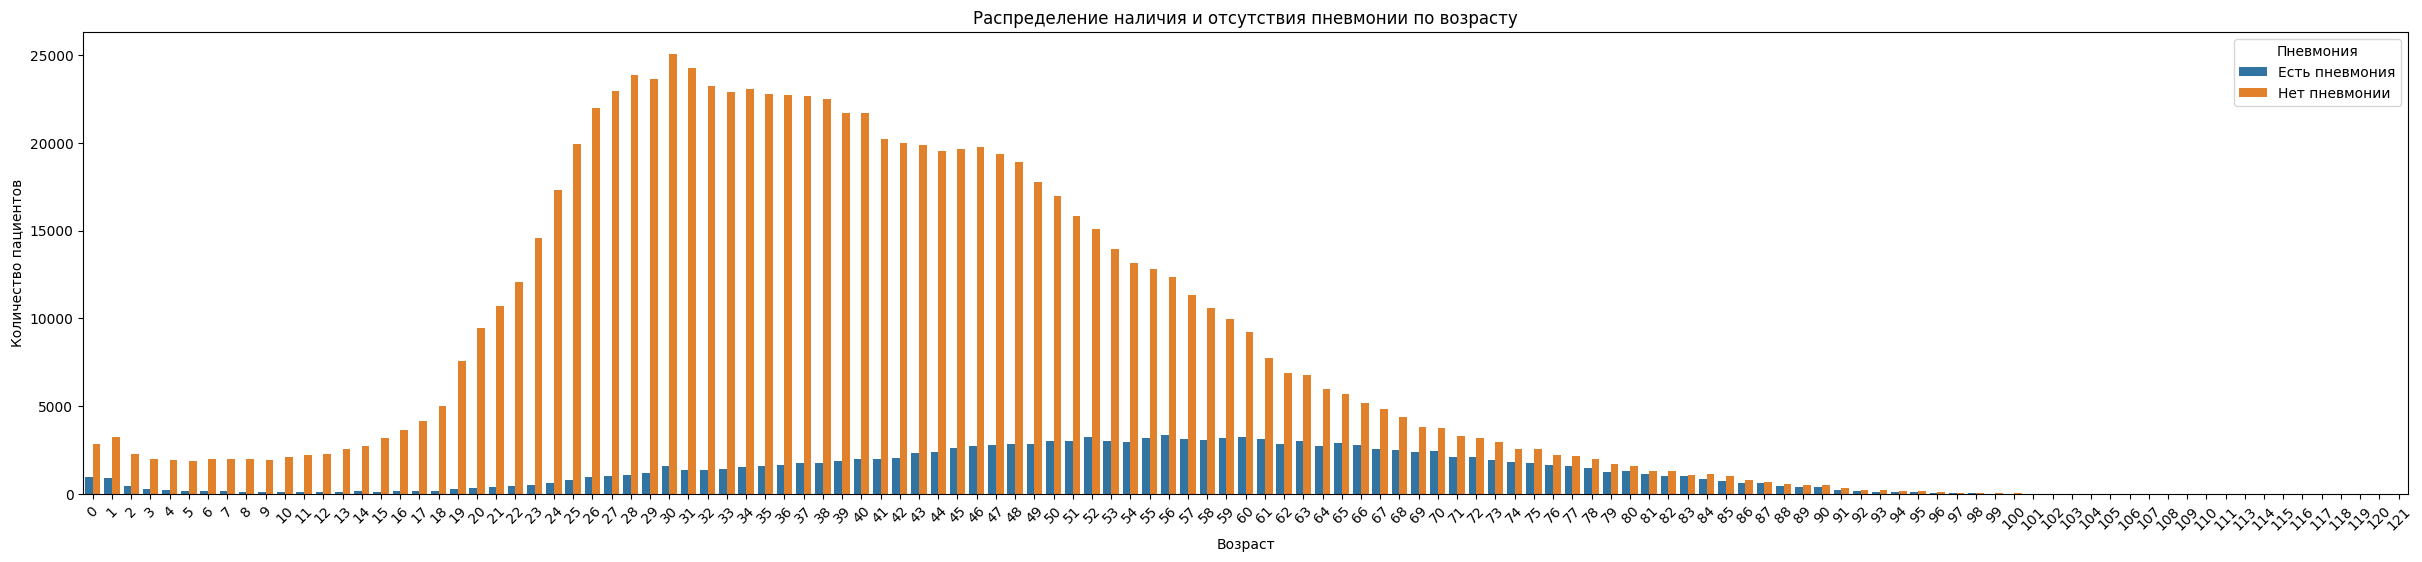

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создайте новый столбец 'PNEUMONIA_LABEL' для легенды
df['PNEUMONIA_LABEL'] = df['PNEUMONIA'].map({1.0: 'Есть пневмония', 2.0: 'Нет пневмонии'})

# Создание бар-графика
plt.figure(figsize=(30, 6))
sns.countplot(x='AGE', hue='PNEUMONIA_LABEL', data=df)
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.title('Распределение наличия и отсутствия пневмонии по возрасту')
plt.legend(title='Пневмония', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


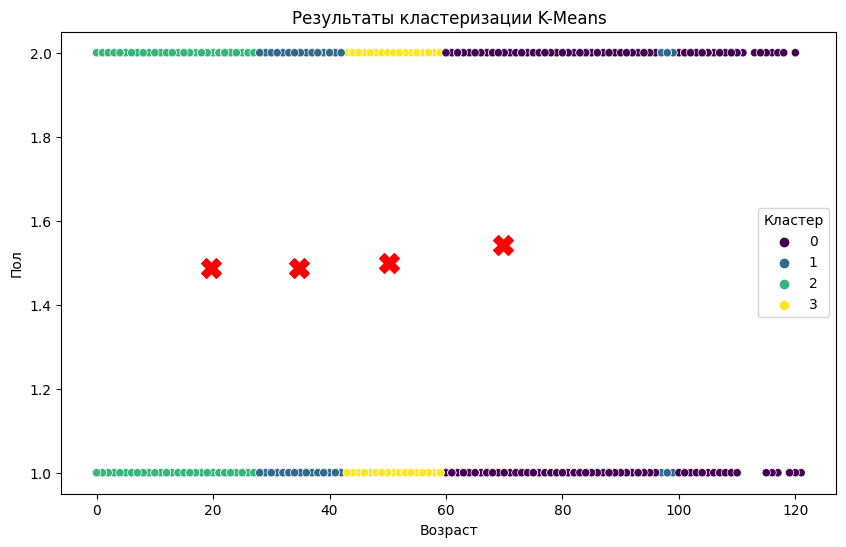

In [43]:
# Выбор признаков для кластеризации
# Для примера возьмем AGE и еще один признак, допустим, SEX (предполагается, что SEX уже закодирован)
features = ['AGE', 'SEX']
X = df_cluster[features].values

# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Добавляем метки кластеров в исходный датафрейм для визуализации
df['cluster_labels'] = cluster_labels

# Визуализируем результаты кластеризации
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['cluster_labels'], palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Возраст')
plt.ylabel('Пол')
plt.title('Результаты кластеризации K-Means')
plt.legend(title='Кластер')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

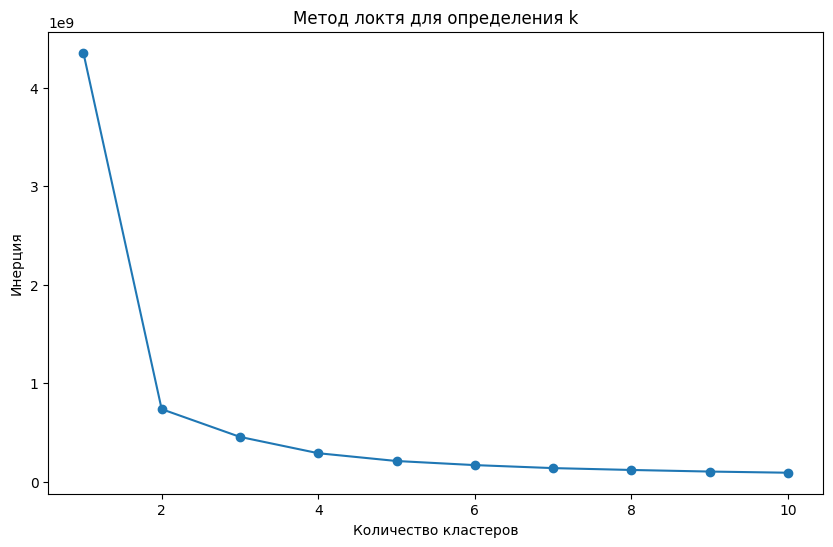

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


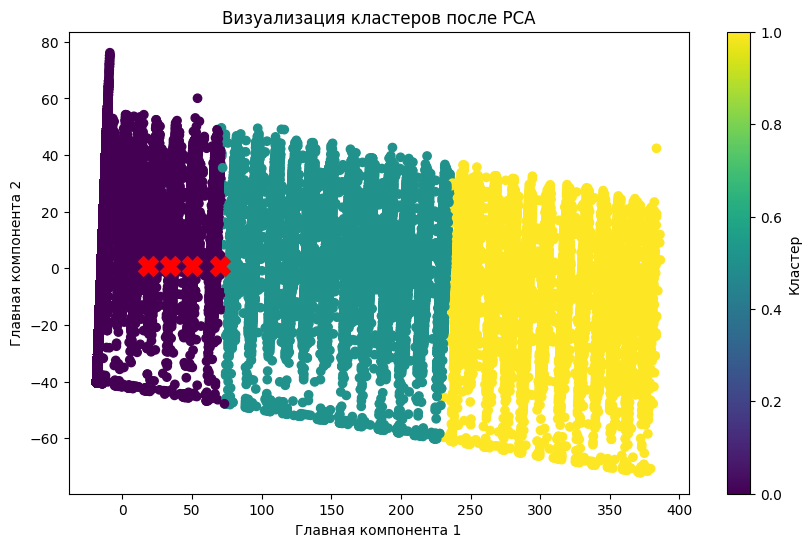

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Предполагаем, что df_cluster уже содержит подготовленные данные для кластеризации

# 1. Определение оптимального числа кластеров k
# Для этого мы можем визуализировать метод локтя
inertia = []
for k in range(1, 11):  # Пробуем от 1 до 10 кластеров
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для определения kластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

# Предположим, после визуализации мы выбрали k = 3

# 2. Применение k-means кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

# 3. Визуализация результатов кластеризации
# Для начала уменьшим размерность для визуализации, используя PCA
pca = PCA(n_components=2)  # Двумерное представление
df_cluster_pca = pca.fit_transform(df_cluster.drop('cluster', axis=1))

# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster_pca[:, 0], df_cluster_pca[:, 1], c=df_cluster['cluster'], cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('Визуализация кластеров после PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Кластер')
plt.show()

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here